In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [9]:
dataset_path= 'Housing.csv'
data = pd.read_csv(dataset_path)

In [10]:
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [11]:
data.isnull().sum()

x= data.drop('price', axis=1)
y= data['price']

In [12]:
x= pd.get_dummies(x)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred = model.predict(x_test)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1025824.3793577981
Mean Squared Error: 1971426095653.9329
R-squared: 0.6099715703676805


In [17]:
feature_importance = model.feature_importances_
feature_names = x.columns

In [18]:
indices = np.argsort(feature_importance)[::-1]

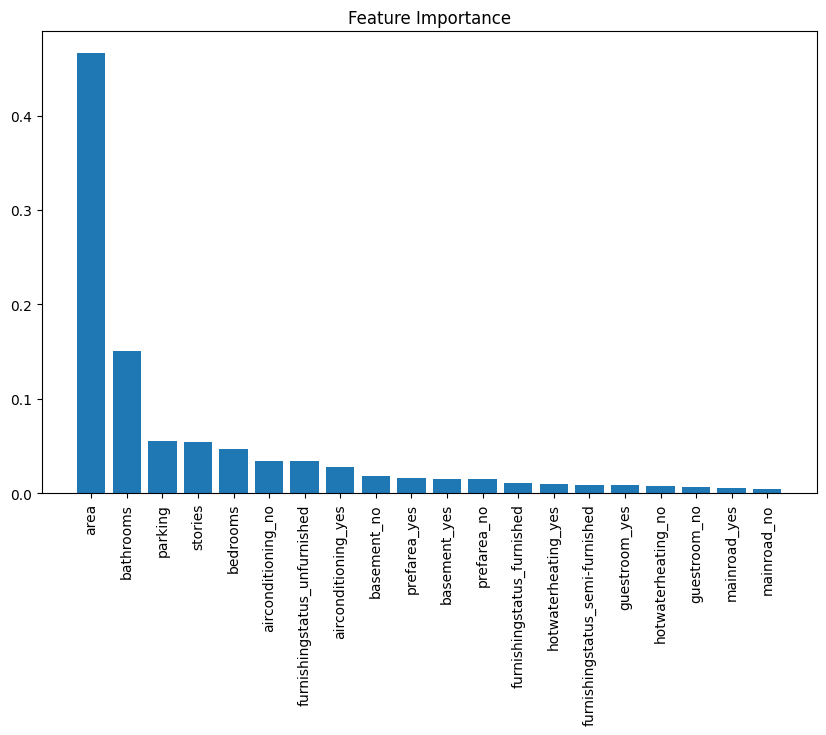

In [19]:
plt.figure(figsize=(10,6))
plt.bar(range(x.shape[1]), feature_importance[indices], align='center')  # corrected 'centre' to 'center'
plt.xticks(range(x.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Importance')
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression


In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(x_test)

In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [25]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 970043.4039201635
Mean Squared Error: 1754318687330.6614
R-squared: 0.6529242642153188


In [26]:
feature_coefficients = model.coef_

In [27]:
feature_names = x.columns

In [28]:
indices = np.argsort(np.abs(feature_coefficients))[::-1]

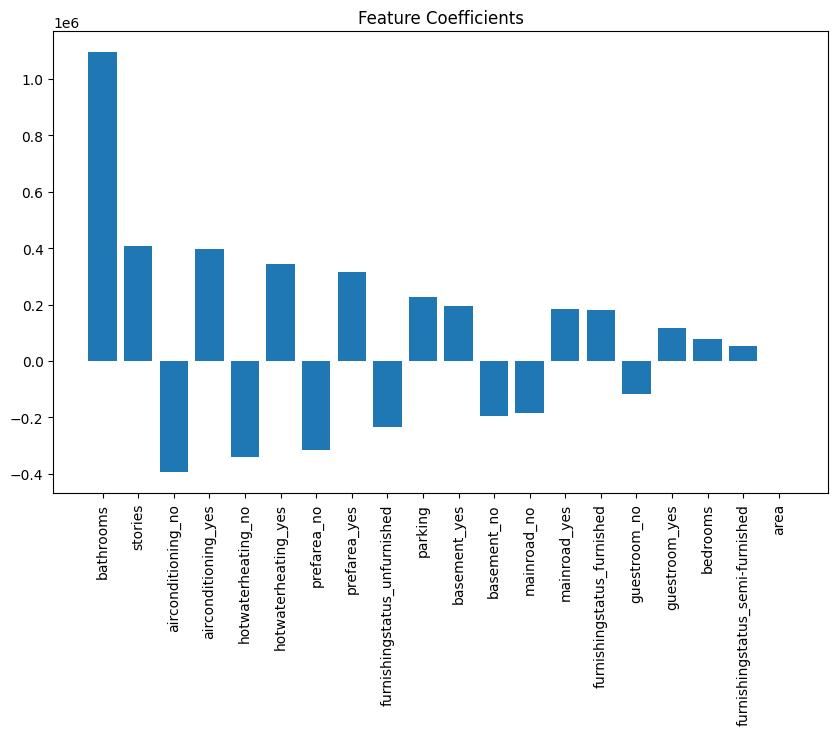

In [29]:
plt.figure(figsize=(10,6))
plt.bar(range(x.shape[1]), feature_coefficients[indices], align='center')
plt.xticks(range(x.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Coefficients')
plt.show()